In [1]:
pip install deepface


  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116951 sha256=dac004e86d71f946bebc88dd46067624d75723deee8379c8f2aab81661195b13
  Stored in directory: c:\users\rishi r\appdata\local\pip\cache\wheels\f7\f1\89\b9ea2bf8f80ec027a88fef1d354b3816b4d3d29530988972f6
Successfully built fire
Note: you may need to restart the kernel to use updated packages.


In [25]:

from deepface import DeepFace

D:\anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Directory  C:\Users\RISHI R /.deepface created
Directory  C:\Users\RISHI R /.deepface/weights created


In [13]:
import cv2

In [21]:
img =cv2.imread('C:/MACHINE LEARNING/face emote/Happyman.jpg')

In [22]:
import matplotlib.pyplot as plt

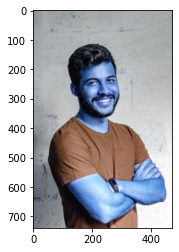

In [23]:
plt.imshow(img)
plt.show()

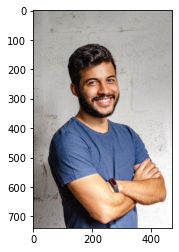

In [24]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [27]:
predictions = DeepFace.analyze(img)

facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: C:\Users\RISHI R\.deepface\weights\facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:01<00:00, 5.80MB/s]


age_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: C:\Users\RISHI R\.deepface\weights\age_model_weights.h5
100%|██████████| 539M/539M [03:07<00:00, 2.88MB/s] 


gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: C:\Users\RISHI R\.deepface\weights\gender_model_weights.h5
100%|██████████| 537M/537M [03:27<00:00, 2.59MB/s] 


race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/race_model_single_batch.h5
To: C:\Users\RISHI R\.deepface\weights\race_model_single_batch.h5
100%|██████████| 537M/537M [04:04<00:00, 2.19MB/s] 
Action: race: 100%|██████████| 4/4 [00:06<00:00,  1.63s/it]   


In [28]:
predictions

[{'emotion': {'angry': 8.312954816701301e-11,
   'disgust': 2.4992555120705945e-22,
   'fear': 8.818955876677137e-06,
   'happy': 99.99933242797852,
   'sad': 3.520626498665358e-10,
   'surprise': 0.0006553316779900342,
   'neutral': 5.59001698263728e-06},
  'dominant_emotion': 'happy',
  'region': {'x': 153, 'y': 180, 'w': 159, 'h': 159},
  'age': 24,
  'gender': {'Woman': 0.02118582633556798, 'Man': 99.97881054878235},
  'dominant_gender': 'Man',
  'race': {'asian': 4.4302865862846375,
   'indian': 20.59645652770996,
   'black': 4.386618733406067,
   'white': 18.299618363380432,
   'middle eastern': 19.502034783363342,
   'latino hispanic': 32.78498351573944},
  'dominant_race': 'latino hispanic'}]

In [29]:
type(predictions)

list

In [33]:
predictions[0]['dominant_emotion']

'happy'

In [34]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [35]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = faceCascade.detectMultiScale(gray,1.1,4)
#draw rectangle around the faces
for(x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

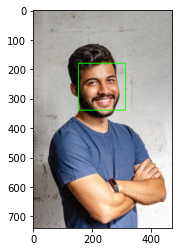

In [36]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [39]:
font = cv2.FONT_HERSHEY_SIMPLEX
#inserting text in video
cv2.putText(img,predictions[0]['dominant_emotion'],(0, 50),font, 1, (0, 0, 255), 2, cv2.LINE_4);

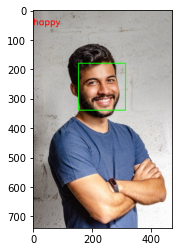

In [40]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [44]:
import cv2
from deepface import DeepFace
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
cap=cv2.VideoCapture(1)
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open Webcam")
while True:
    ret,frame = cap.read()
    result = DeepFace.analyze(frame, actions = ['emotion'])
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces=faceCascade.detectMultiScale(gray,1.1,4)
    for(x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
    font = cv2.FONT_HERSHEY_SIMPLEX    
    cv2.putText(frame, result[0]['dominant_emotion'],(50,50),font,3,(0,0,255),2,cv2.LINE_4)
    cv2.imshow('Demo Video',frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 16.71it/s]


ValueError: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.